In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
!wget "https://raw.githubusercontent.com/VU-CSP/quantbio-assignments/main/growth_fxns.py"
from growth_fxns import *

--2023-02-27 21:02:42--  https://raw.githubusercontent.com/VU-CSP/quantbio-assignments/main/growth_fxns.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2307 (2.3K) [text/plain]
Saving to: 'growth_fxns.py.2'

growth_fxns.py.2    100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-02-27 21:02:44 (8.80 MB/s) - 'growth_fxns.py.2' saved [2307/2307]



In [3]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [4]:
!wget "https://raw.githubusercontent.com/VU-CSP/quantbio-assignments/main/MCF10A_trametinib.csv"
d = pd.read_csv("MCF10A_trametinib.csv")
d.head()

--2023-02-27 21:02:47--  https://raw.githubusercontent.com/VU-CSP/quantbio-assignments/main/MCF10A_trametinib.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13490 (13K) [text/plain]
Saving to: 'MCF10A_trametinib.csv.2'

MCF10A_trametinib.c 100%[===================>]  13.17K  --.-KB/s    in 0.001s  

2023-02-27 21:02:47 (13.6 MB/s) - 'MCF10A_trametinib.csv.2' saved [13490/13490]



,well,time,cell.count,uid,drug1,drug1.conc
0,A01,0.8,32,10ACh-28A_H03,trametinib,0.000004
1,A01,5.6,25,10ACh-28A_H03,trametinib,0.000004
2,A01,10.5,31,10ACh-28A_H03,trametinib,0.000004
3,A01,15.3,53,10ACh-28A_H03,trametinib,0.000004
4,A01,20.0,39,10ACh-28A_H03,trametinib,0.000004


In [5]:
d.insert(2,"l2",np.empty_like(d["cell.count"]))
d.head

<bound method NDFrame.head of     well   time               l2  cell.count            uid       drug1  \
0    A01    0.8                0          32  10ACh-28A_H03  trametinib   
1    A01    5.6  140680252110854          25  10ACh-28A_H03  trametinib   
2    A01   10.5                0          31  10ACh-28A_H03  trametinib   
3    A01   15.3  140680252110854          53  10ACh-28A_H03  trametinib   
4    A01   20.0  140680252110950          39  10ACh-28A_H03  trametinib   
..   ...    ...              ...         ...            ...         ...   
295  A12   96.7                0          60  10ACh-28B_H03  trametinib   
296  A12  101.8                0          60  10ACh-28B_H03  trametinib   
297  A12  106.9                0          61  10ACh-28B_H03  trametinib   
298  A12  112.0                0          64  10ACh-28B_H03  trametinib   
299  A12  117.2                0          58  10ACh-28B_H03  trametinib   

     drug1.conc  
0      0.000004  
1      0.000004  
2      0.000004

In [6]:
d.insert(3,"pd",np.empty_like(d["cell.count"]))
d.head

<bound method NDFrame.head of     well   time               l2               pd  cell.count            uid  \
0    A01    0.8                0                0          32  10ACh-28A_H03   
1    A01    5.6  140680252110854  140680252110854          25  10ACh-28A_H03   
2    A01   10.5                0                0          31  10ACh-28A_H03   
3    A01   15.3  140680252110854  140680252110854          53  10ACh-28A_H03   
4    A01   20.0  140680252110950  140680252110950          39  10ACh-28A_H03   
..   ...    ...              ...              ...         ...            ...   
295  A12   96.7                0                0          60  10ACh-28B_H03   
296  A12  101.8                0                0          60  10ACh-28B_H03   
297  A12  106.9                0                0          61  10ACh-28B_H03   
298  A12  112.0                0                0          64  10ACh-28B_H03   
299  A12  117.2                0                0          58  10ACh-28B_H03   

         

In [7]:
d["l2"] = np.round(np.log2(d["cell.count"]),3)
d.head

<bound method NDFrame.head of     well   time     l2               pd  cell.count            uid  \
0    A01    0.8  5.000                0          32  10ACh-28A_H03   
1    A01    5.6  4.644  140680252110854          25  10ACh-28A_H03   
2    A01   10.5  4.954                0          31  10ACh-28A_H03   
3    A01   15.3  5.728  140680252110854          53  10ACh-28A_H03   
4    A01   20.0  5.285  140680252110950          39  10ACh-28A_H03   
..   ...    ...    ...              ...         ...            ...   
295  A12   96.7  5.907                0          60  10ACh-28B_H03   
296  A12  101.8  5.907                0          60  10ACh-28B_H03   
297  A12  106.9  5.931                0          61  10ACh-28B_H03   
298  A12  112.0  6.000                0          64  10ACh-28B_H03   
299  A12  117.2  5.858                0          58  10ACh-28B_H03   

          drug1  drug1.conc  
0    trametinib    0.000004  
1    trametinib    0.000004  
2    trametinib    0.000004  
3    tram

In [8]:
d["pd"] = flatten_matrix([np.round(d[d["well"]==w]["l2"] - d[d["well"]==w]["l2"].to_list()[0],3) for w in d["well"].unique()])
d.head

<bound method NDFrame.head of     well   time     l2     pd  cell.count            uid       drug1  \
0    A01    0.8  5.000  0.000          32  10ACh-28A_H03  trametinib   
1    A01    5.6  4.644 -0.356          25  10ACh-28A_H03  trametinib   
2    A01   10.5  4.954 -0.046          31  10ACh-28A_H03  trametinib   
3    A01   15.3  5.728  0.728          53  10ACh-28A_H03  trametinib   
4    A01   20.0  5.285  0.285          39  10ACh-28A_H03  trametinib   
..   ...    ...    ...    ...         ...            ...         ...   
295  A12   96.7  5.907  0.778          60  10ACh-28B_H03  trametinib   
296  A12  101.8  5.907  0.778          60  10ACh-28B_H03  trametinib   
297  A12  106.9  5.931  0.802          61  10ACh-28B_H03  trametinib   
298  A12  112.0  6.000  0.871          64  10ACh-28B_H03  trametinib   
299  A12  117.2  5.858  0.729          58  10ACh-28B_H03  trametinib   

     drug1.conc  
0      0.000004  
1      0.000004  
2      0.000004  
3      0.000004  
4      0.000004

Assignment task #1
Copy and execute a chunk of code from the line assigning values to d["pd"]. Describe what you did and the output in the following markup block.

See above cell for code.

Explanation - This line of code calculates the population doublings and adds them to the pd column that we added a couple lines prior. Specifically, the flatten matrix function is making sure the output goes into a single row (the pd row). The next bit is calculating the population doubling, which requires linking the ln2 values to the time passed between each aquisition, which is why you have to loop through, subtracting the time from the previous line from the current line. I'm not sure if this code is correct

/var/folders/2q/ytwssmjd65j4b008dq26cs280000gn/T/ipykernel_2545/1447241058.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


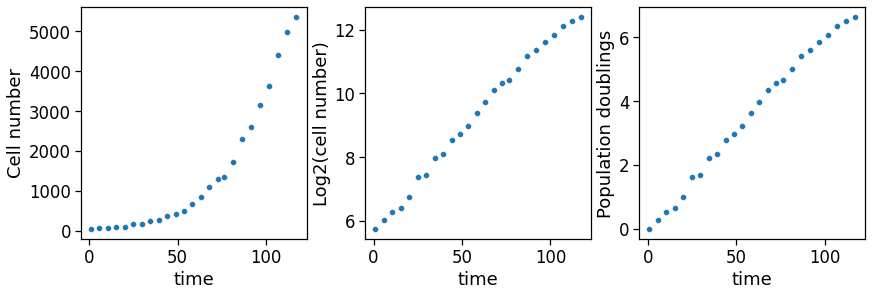

In [12]:
ss = d[d["well"]=="A02"]
names = ['Linear', 'Log2', 'Normalized log2']
fig, axs = plt.subplots(figsize=(12, 4), layout="constrained")
plt.subplot(131)
plt.ylabel('Cell number')
sns.scatterplot(data=ss, x="time", y="cell.count")
plt.subplot(132)
plt.ylabel('Log2(cell number)')
sns.scatterplot(data=ss, x="time", y="l2")
plt.subplot(133)
plt.ylabel('Population doublings')
sns.scatterplot(data=ss, x="time", y="pd")
plt.show()

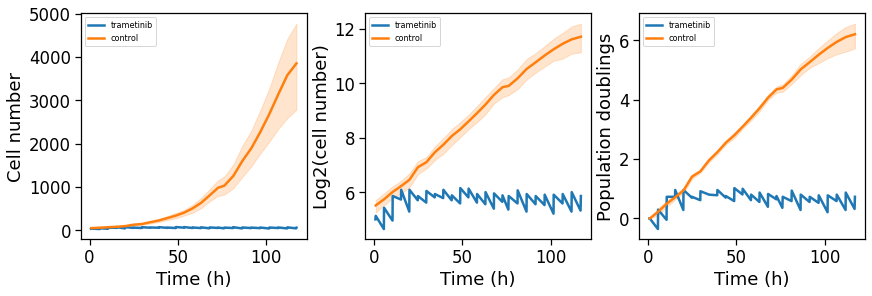

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), layout="constrained")
plt.subplot(131)
plt.xlabel('Time (h)')
plt.ylabel('Cell number')
sns.lineplot(data=d, x="time", y="cell.count", hue="drug1")
plt.legend(loc='upper left', fontsize='8')
plt.subplot(132)
plt.xlabel('Time (h)')
plt.ylabel('Log2(cell number)')
sns.lineplot(data=d, x="time", y="l2", hue="drug1")
plt.legend(loc='upper left', fontsize='8')
plt.subplot(133)
plt.xlabel('Time (h)')
plt.ylabel('Population doublings')
sns.lineplot(data=d, x="time", y="pd", hue="drug1")
plt.legend(loc='upper left', fontsize='8')
plt.show()

In [14]:
n_tram = len(d[d["drug1"]=="trametinib"]["well"].unique())
n_ctrl = len(d[d["drug1"]!="trametinib"]["well"].unique())

print(f"Wells with trametinib treatment: n = {n_tram}\nControl wells: n = {n_ctrl}")

Wells with trametinib treatment: n = 2
Control wells: n = 10


The shaded areas represent confidence intervals. Compare the confidence interval between the log2 and normalized log2 plots, especially at time < 100 h.

The confidence interval is narrower for the normalized log2 plot, indicating a greater degree of precision.

How many samples of each type are there? Calculate this by counting the number of unique wells there are in each group (drug1==trametinib or control)

See above

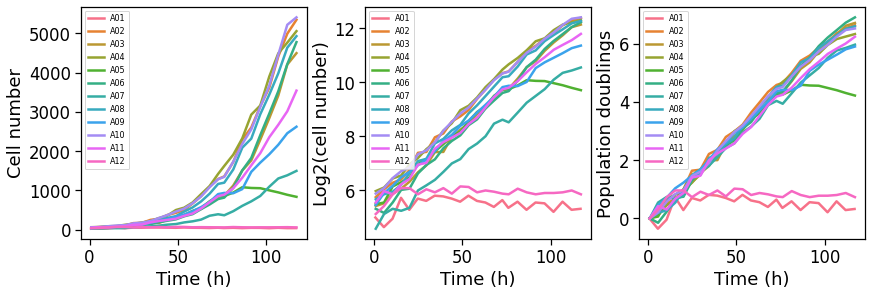

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), layout="constrained")
plt.subplot(131)
plt.xlabel('Time (h)')
plt.ylabel('Cell number')
sns.lineplot(data=d, x="time", y="cell.count", hue="well")
plt.legend(loc='upper left', fontsize='8')
plt.subplot(132)
plt.xlabel('Time (h)')
plt.ylabel('Log2(cell number)')
sns.lineplot(data=d, x="time", y="l2", hue="well")
plt.legend(loc='upper left', fontsize='8')
plt.subplot(133)
plt.xlabel('Time (h)')
plt.ylabel('Population doublings')
sns.lineplot(data=d, x="time", y="pd", hue="well")
plt.legend(loc='upper left', fontsize='8')
plt.show()

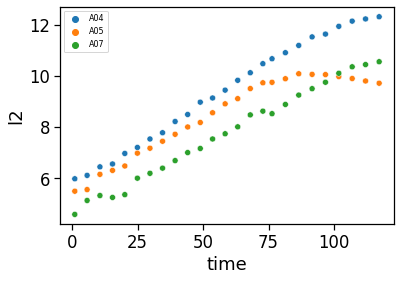

In [16]:
# dtp = data to plot
dtp = d[(d["well"] == "A04") | (d["well"] == "A05") | (d["well"] == "A07")]
sns.scatterplot(data=dtp, x="time", y="l2", hue="well")
plt.legend(loc='upper left', fontsize='8')

Assignment task #2
Generate a scatterplot of population doublings over time for the same wells as the block above (wells A04, A05 and A07). Describe the difference you see between the new graph and the graph of data in log2 scale.

*In the pd plot (below), there is really no difference between wells until around time 75, when well A05 clearly peters off. Additionally, wells A04 and A07 seem to align closer in the pd plot, whereas in the l2 plot, there is more separation.

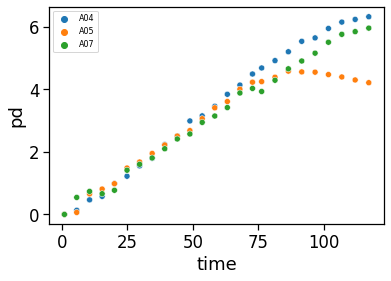

In [17]:
# dtp = data to plot
dtp = d[(d["well"] == "A04") | (d["well"] == "A05") | (d["well"] == "A07")]
sns.scatterplot(data=dtp, x="time", y="pd", hue="well") #changed y axis to pd
plt.legend(loc='upper left', fontsize='8')

In [18]:
from scipy.stats import linregress

In [19]:
# dtf = data to fit
dtf = d[d["drug1.conc"]==0]
ctrl_wells = dtf["well"].unique()

In [20]:
res = [linregress(dtf[dtf["well"]==ctrl_wells[i]][["time","l2"]]) for i in np.arange(len(ctrl_wells))]

In [21]:
example_well = dtf["well"].unique()[1]
print(f"Example linregress output for well {example_well}")
res[1]

Example linregress output for well A03


LinregressResult(slope=0.060846424497371744, intercept=5.212788495165553, rvalue=0.9990947611147231, pvalue=4.776167619926461e-33, stderr=0.0005402101680293283, intercept_stderr=0.036687154857080205)

In [22]:
prates = pd.Series(data=[np.round(r.slope,4) for r in res], index=ctrl_wells)
prates

A02    0.0602
A03    0.0608
A04    0.0596
A05    0.0421
A06    0.0632
A07    0.0528
A08    0.0612
A09    0.0515
A10    0.0592
A11    0.0557
dtype: float64

In [23]:
r2_vals = pd.Series(data=[np.round(r.rvalue**2,4) for r in res], index=ctrl_wells)
r2_vals

A02    0.9940
A03    0.9982
A04    0.9916
A05    0.8989
A06    0.9976
A07    0.9948
A08    0.9951
A09    0.9906
A10    0.9963
A11    0.9961
dtype: float64

Assignment task #3
Perform linear regression using the linregress function on the trametinib-treated wells. Describe how the proliferation rates compare to the rates of the control wells in the subsequent markdown block.

In [28]:
dtf = d[d["drug1.conc"]!=0] #changed to does not equal 0
tram_wells = dtf["well"].unique()
res = [linregress(dtf[dtf["well"]==tram_wells[i]][["time","l2"]]) for i in np.arange(len(tram_wells))]
example_well = dtf["well"].unique()[1]
print(f"Example linregress output for well {example_well}")
res[1]

Example linregress output for well A12


LinregressResult(slope=0.0018027181675447268, intercept=5.804797993779366, rvalue=0.2947633020923504, pvalue=0.1526106083686435, stderr=0.001218577477198253, intercept_stderr=0.08275694027457718)

*The proliferation rates, which I assume is indicated by the slope, differ by an entire order of magnitude, with the trametinib-treated wells being much lower.

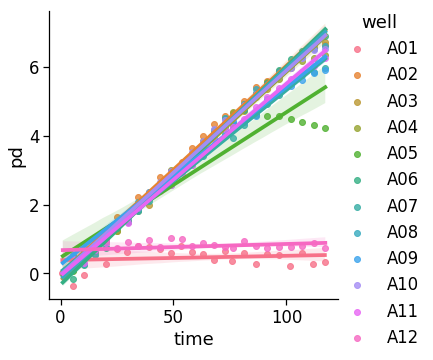

In [29]:
p = sns.lmplot(data=d, x="time", y="pd", hue="well")

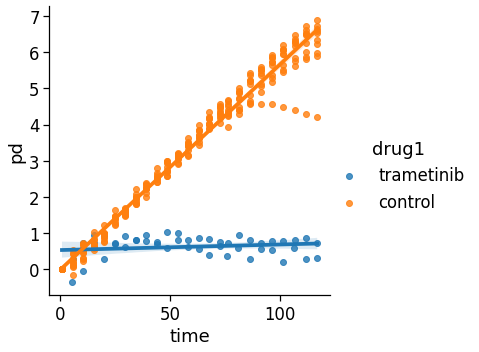

In [30]:
p = sns.lmplot(data=d, x="time", y="pd", hue="drug1")